<h1 style="text-align: center; color: #98CD00; font-family: Arial, sans-serif;">
  Telco Customer Churn DataSet
</h1>

<h3 style="text-align: center; color: #A4DD00; font-family: Arial, sans-serif;">
  Deep Learning
</h3>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

<h3 style="background-color: #98CD00; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Load And Read Data
</h3>


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DL Project/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<h3 style="background-color: #98CD00; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  EDA
</h3>


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### From the data.info observe the data type of column TotalCharges is object but it float so change it

In [ ]:
df["TotalCharges"].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

<h3 style="background-color: #98CD00; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Handle Data
</h3>


In [ ]:
df.drop(["customerID"],axis=1,inplace=True)

In [ ]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Column Distribution Summary

- **SeniorCitizen**: The column contains mostly values equal to `0` (binary, imbalanced).  
- **tenure**: The column is continuous and approximately semi-normal (fairly spread across values).  
- **MonthlyCharges**: The column is continuous and approximately semi-normal (slightly skewed but near normal).  
- **TotalCharges**: The column is continuous and **right skewed** (mean > median, long tail on higher values).  


In [ ]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [ ]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


## not respictively null value so can fill it with interpolate method

In [ ]:
df['TotalCharges'].interpolate(method='linear',inplace=True)

In [ ]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df.duplicated().sum()

np.int64(22)

<h3 style="background-color: #98CD00; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Data Visualization
</h3>


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
columns_object=[col for col in df.columns if df[col].dtype=="object"]

In [ ]:
columns_object

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
columns_num = [col for col in df.columns if col not in columns_object]

In [ ]:
columns_num

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
for col in columns_object:
    print(f" column name is: {col} ===> {df[col].unique()}")
    print("*" * 60)


 column name is: gender ===> ['Female' 'Male']
************************************************************
 column name is: Partner ===> ['Yes' 'No']
************************************************************
 column name is: Dependents ===> ['No' 'Yes']
************************************************************
 column name is: PhoneService ===> ['No' 'Yes']
************************************************************
 column name is: MultipleLines ===> ['No phone service' 'No' 'Yes']
************************************************************
 column name is: InternetService ===> ['DSL' 'Fiber optic' 'No']
************************************************************
 column name is: OnlineSecurity ===> ['No' 'Yes' 'No internet service']
************************************************************
 column name is: OnlineBackup ===> ['Yes' 'No' 'No internet service']
************************************************************
 column name is: DeviceProtection ===> ['No' 'Yes' 'N

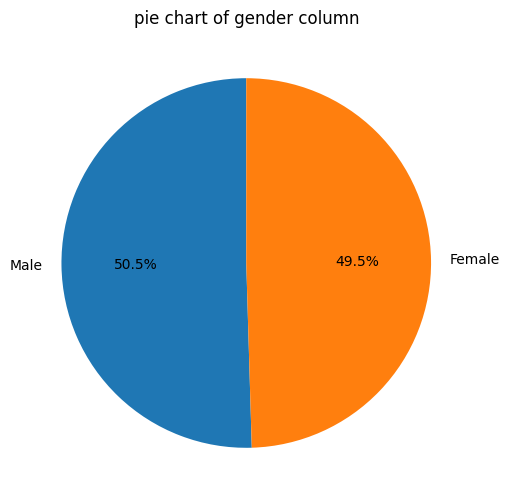

In [ ]:
counts=df['gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=90)
plt.title("pie chart of gender column")
plt.show()

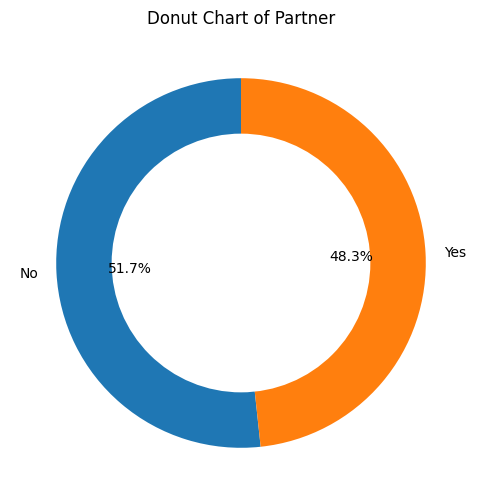

In [ ]:
counts=df['Partner'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Donut Chart of Partner')
plt.show()


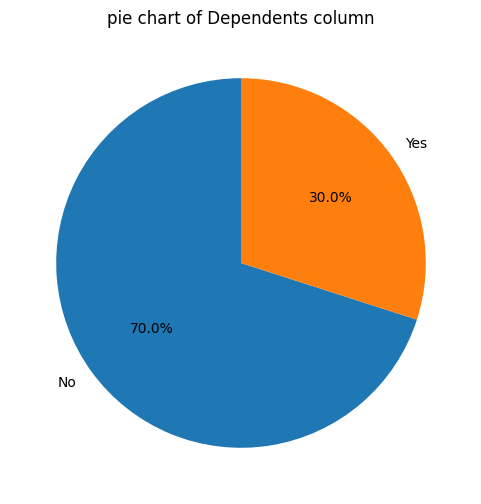

In [ ]:
counts=df['Dependents'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=90)
plt.title("pie chart of Dependents column")
plt.show()

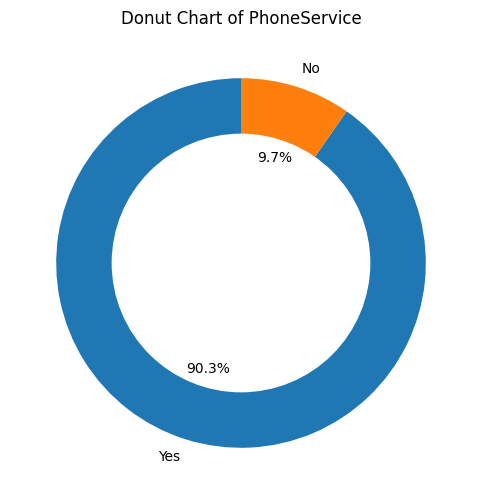

In [ ]:

counts=df['PhoneService'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Donut Chart of PhoneService')
plt.show()


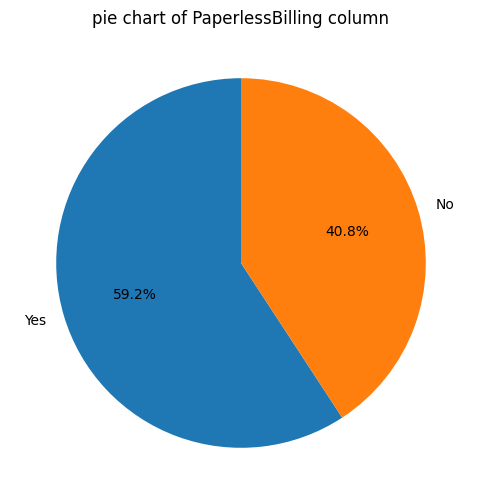

In [ ]:

counts=df['PaperlessBilling'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=90)
plt.title("pie chart of PaperlessBilling column")
plt.show()

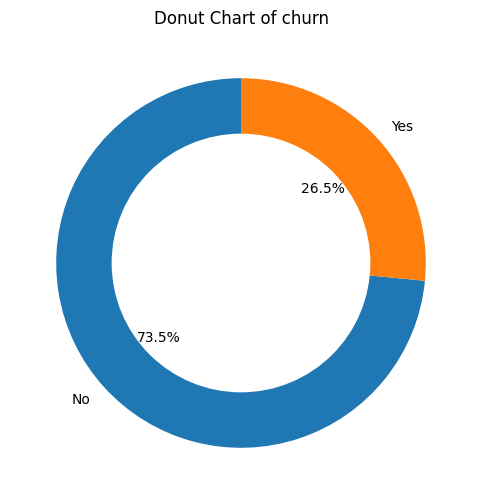

In [ ]:


counts=df['Churn'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Donut Chart of churn')
plt.show()


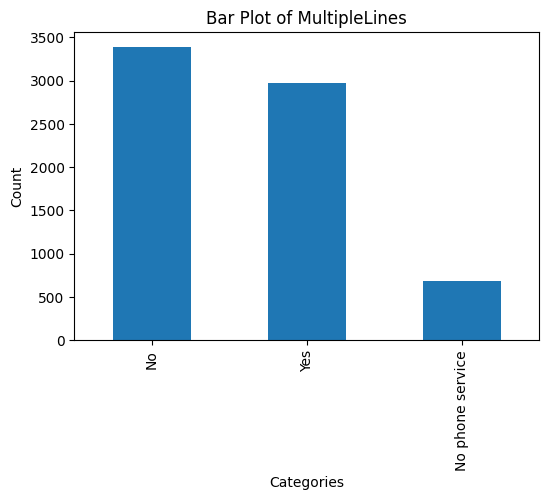

In [ ]:

plt.figure(figsize=(6,4))
df['MultipleLines'].value_counts().plot(kind='bar')

plt.title("Bar Plot of MultipleLines")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

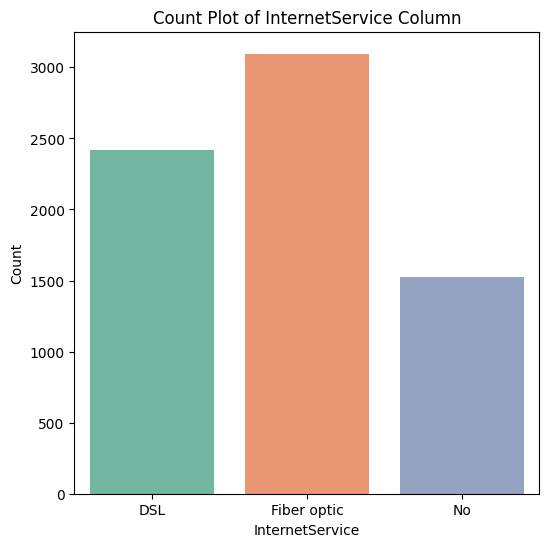

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x="InternetService", data=df, palette="Set2")
plt.title("Count Plot of InternetService Column")
plt.xlabel("InternetService")
plt.ylabel("Count")
plt.show()

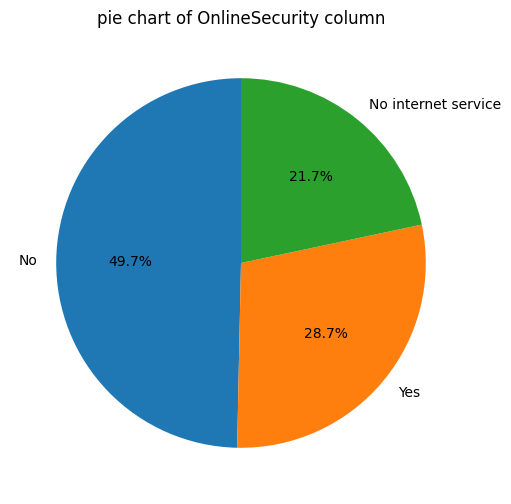

In [ ]:

counts=df['OnlineSecurity'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=90)
plt.title("pie chart of OnlineSecurity column")
plt.show()

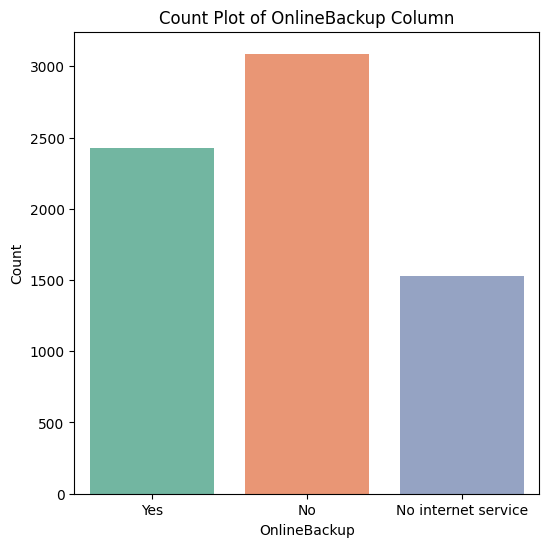

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x="OnlineBackup", data=df, palette="Set2")
plt.title("Count Plot of OnlineBackup Column")
plt.xlabel("OnlineBackup")
plt.ylabel("Count")
plt.show()

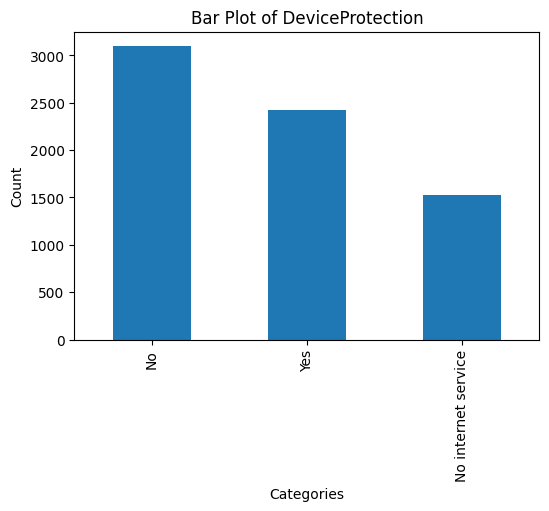

In [ ]:

plt.figure(figsize=(6,4))
df['DeviceProtection'].value_counts().plot(kind='bar')

plt.title("Bar Plot of DeviceProtection")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

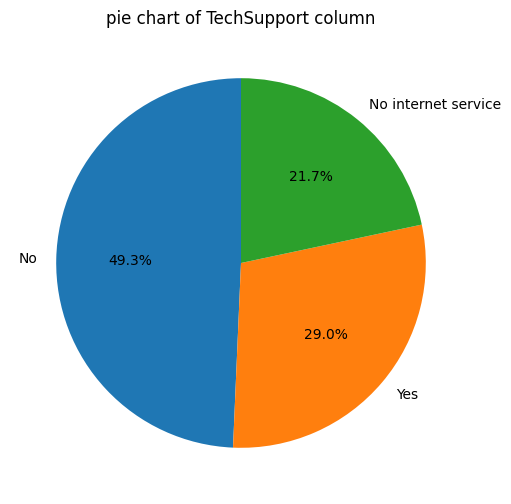

In [ ]:

counts=df['TechSupport'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=90)
plt.title("pie chart of TechSupport column")
plt.show()

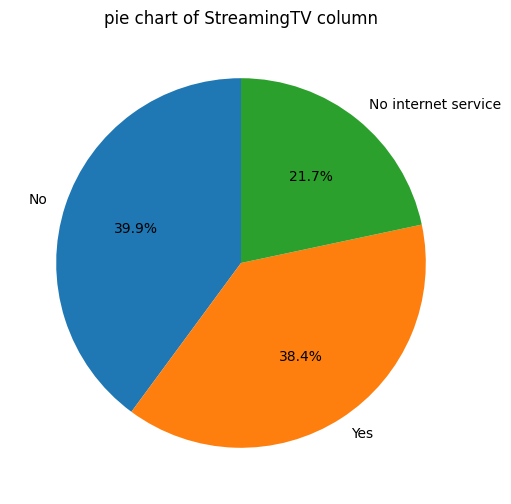

In [ ]:

counts=df['StreamingTV'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=90)
plt.title("pie chart of StreamingTV column")
plt.show()

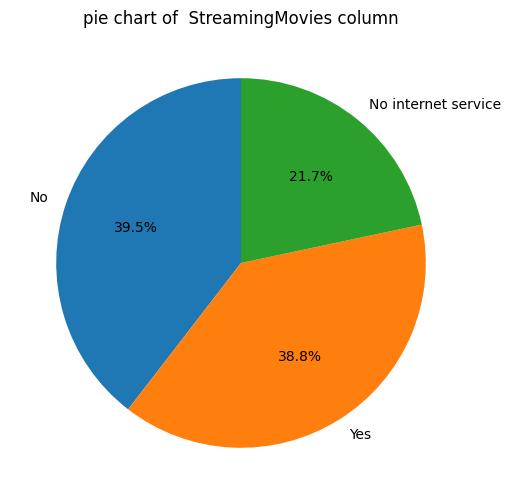

In [ ]:

counts=df['StreamingMovies'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=90)
plt.title("pie chart of  StreamingMovies column")
plt.show()

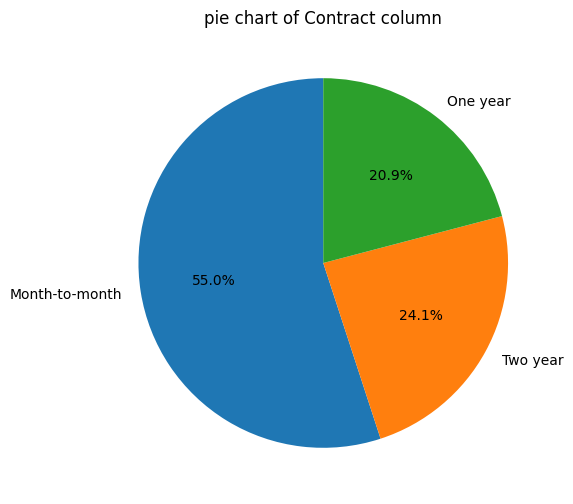

In [ ]:

counts=df['Contract'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=90)
plt.title("pie chart of Contract column")
plt.show()

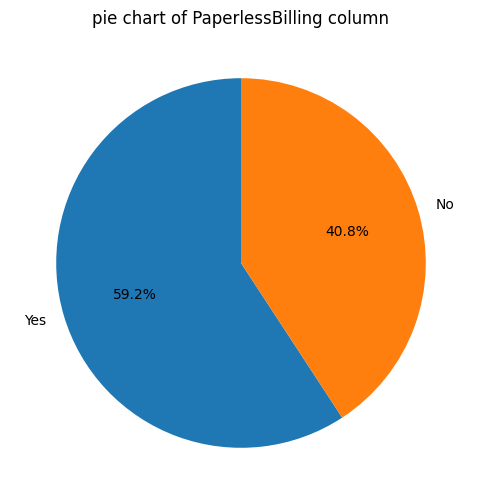

In [ ]:

counts=df['PaperlessBilling'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=90)
plt.title("pie chart of PaperlessBilling column")
plt.show()

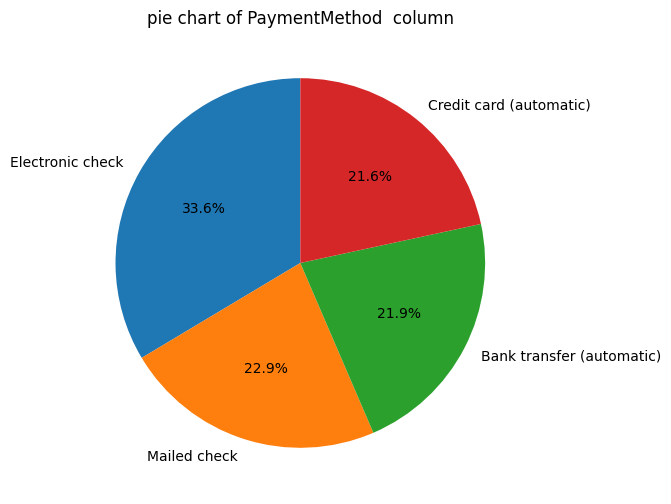

In [ ]:

counts=df['PaymentMethod'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=90)
plt.title("pie chart of PaymentMethod  column")
plt.show()

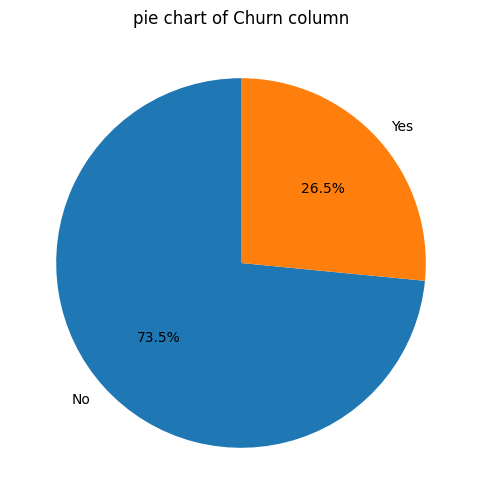

In [ ]:

counts=df['Churn'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=90)
plt.title("pie chart of Churn column")
plt.show()

In [ ]:
columns_num

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

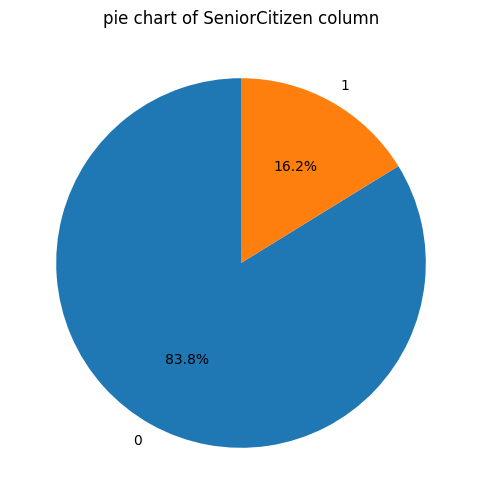

In [ ]:

counts=df['SeniorCitizen'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=90)
plt.title("pie chart of SeniorCitizen column")
plt.show()

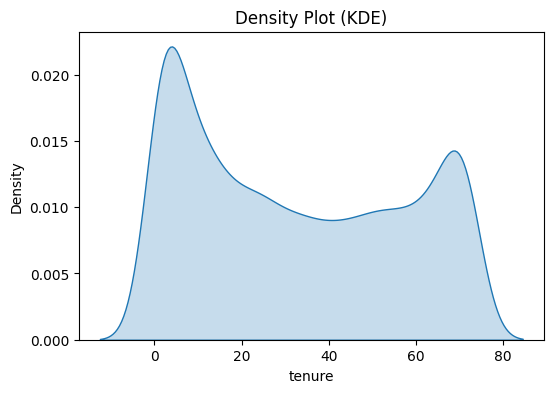

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(df["tenure"], shade=True)
plt.title("Density Plot (KDE)")
plt.show()

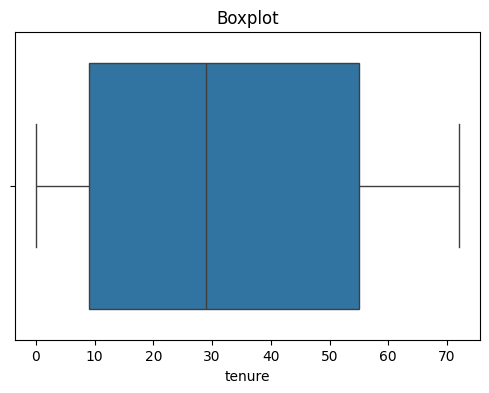

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['tenure'])
plt.title("Boxplot")
plt.show()

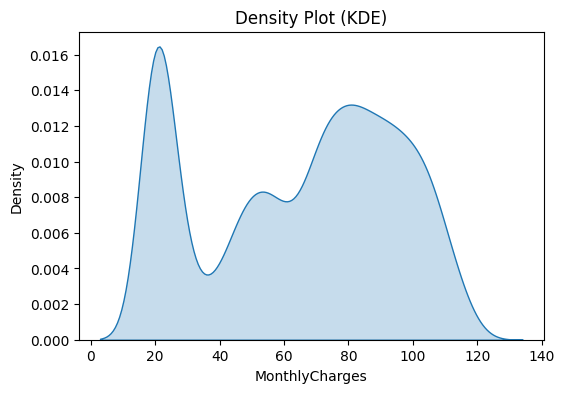

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['MonthlyCharges'], shade=True)
plt.title("Density Plot (KDE)")
plt.show()

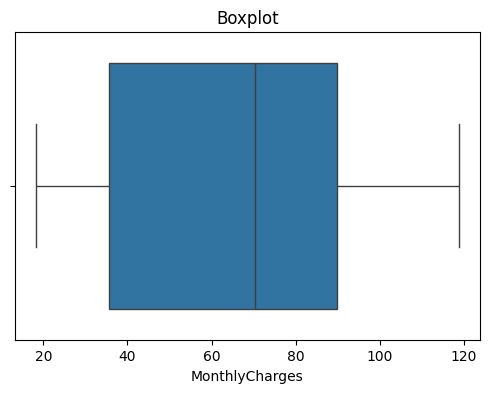

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['MonthlyCharges'])
plt.title("Boxplot")
plt.show()

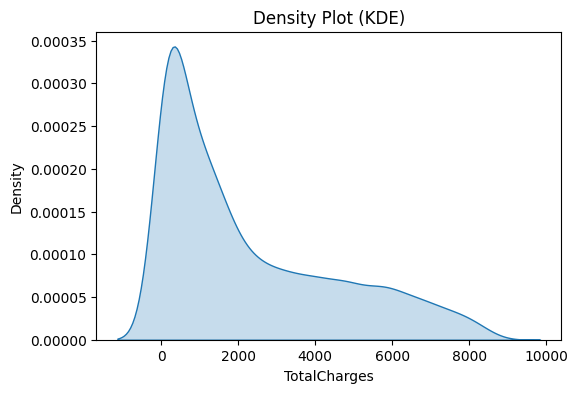

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['TotalCharges'], shade=True)
plt.title("Density Plot (KDE)")
plt.show()

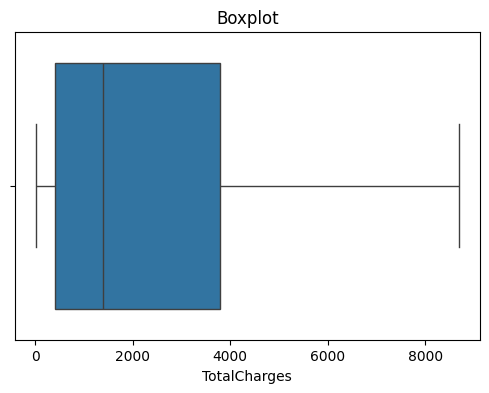

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['TotalCharges'])
plt.title("Boxplot")
plt.show()

<h3 style="background-color: #98CD00; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Feature Engineering
</h3>


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Numerical Columns

- **tenure**: Number of months the customer has stayed with the company  
- **MonthlyCharges**: The amount charged to the customer monthly  
- **TotalCharges**: The total amount charged to the customer  


### observation  

From the data, we can see that **TotalCharges** is directly derived from **MonthlyCharges** and **tenure**:  

\[
\text{TotalCharges} = \text{MonthlyCharges} \times \text{tenure}
\]


In [ ]:
df.drop(["tenure","MonthlyCharges"],axis=1,inplace=True)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.50,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.90,No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.60,Yes


In [ ]:
from scipy.stats import chi2_contingency
target="Churn"
for col in columns_object:
    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Feature: {col}")
    print("Chi2 Stat:", chi2, " | p-value:", p)
    if p < 0.05:
        print("--> Significant relationship with target ✅\n")
    else:
        print("--> No significant relationship with target ❌\n")

Feature: gender
Chi2 Stat: 0.4840828822091383  | p-value: 0.48657873605618596
--> No significant relationship with target ❌

Feature: Partner
Chi2 Stat: 158.7333820309922  | p-value: 2.1399113440759935e-36
--> Significant relationship with target ✅

Feature: Dependents
Chi2 Stat: 189.12924940423474  | p-value: 4.9249216612154196e-43
--> Significant relationship with target ✅

Feature: PhoneService
Chi2 Stat: 0.9150329892546948  | p-value: 0.3387825358066928
--> No significant relationship with target ❌

Feature: MultipleLines
Chi2 Stat: 11.33044148319756  | p-value: 0.0034643829548773
--> Significant relationship with target ✅

Feature: InternetService
Chi2 Stat: 732.309589667794  | p-value: 9.571788222840544e-160
--> Significant relationship with target ✅

Feature: OnlineSecurity
Chi2 Stat: 849.9989679615965  | p-value: 2.661149635176552e-185
--> Significant relationship with target ✅

Feature: OnlineBackup
Chi2 Stat: 601.812790113409  | p-value: 2.0797592160864276e-131
--> Significan

### Feature Selection using Chi-Square Test

From the Chi-Square test, we evaluate the **p-values** of categorical features against the target variable (Churn):

- If **p-value < 0.05** → The feature is **statistically significant** and kept.  
- If **p-value ≥ 0.05** → The feature is **not significant** and dropped.  

Based on the results:  
- **Dropped features:** `gender`, `PhoneService`  
- **Kept features:** All other categorical features


In [ ]:
df.drop(["gender","PhoneService"],axis=1,inplace=True)

In [ ]:
df

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,No
2,0,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,0,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.50,No
7039,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.90,No
7040,0,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,1,Yes,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.60,Yes


In [ ]:
target="Churn"
contingency_table = pd.crosstab(df["SeniorCitizen"], df[target])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Feature: SeniorCitizen")
print("Chi2 Stat:", chi2, " | p-value:", p)
if p < 0.05:
   print("--> Significant relationship with target ✅\n")
else:
     print("--> No significant relationship with target ❌\n")

Feature: SeniorCitizen
Chi2 Stat: 159.42630036838742  | p-value: 1.510066805092378e-36
--> Significant relationship with target ✅



In [ ]:
from sklearn.feature_selection import mutual_info_classif
X = df[["TotalCharges"]]
y = df["Churn"]

mi = mutual_info_classif(X, y, discrete_features=False)

mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi})
print(mi_df.sort_values(by='Mutual_Information', ascending=False))

        Feature  Mutual_Information
0  TotalCharges            0.043804


## decide from another feature

In [ ]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
X = df[['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges']]
y = df["Churn"]


X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = X_encoded[col].astype('category').cat.codes


mi = mutual_info_classif(X_encoded, y, discrete_features=True)

mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'Mutual_Information': mi})
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)
print(mi_df)

             Feature  Mutual_Information
14      TotalCharges            0.537173
11          Contract            0.098453
5     OnlineSecurity            0.064677
8        TechSupport            0.063021
4    InternetService            0.055574
6       OnlineBackup            0.046792
13     PaymentMethod            0.044519
7   DeviceProtection            0.043917
10   StreamingMovies            0.032001
9        StreamingTV            0.031908
12  PaperlessBilling            0.019194
2         Dependents            0.014467
1            Partner            0.011454
0      SeniorCitizen            0.010577
3      MultipleLines            0.000801


### Observation from Mutual Information Analysis

Based on the Mutual Information scores with the target (`Churn`), the following features provide very little information and are suggested to be dropped:

- `MultipleLines`  
- `SeniorCitizen`  
- `Partner`  
- `Dependents`
> These features have low MI values, indicating they contribute minimally to predicting churn.


In [ ]:
df.drop(['MultipleLines','SeniorCitizen','Partner','Dependents'],axis=1,inplace= True)

### Observation from Mutual Information Analysis

From the Mutual Information scores, the two features:

- `StreamingMovies` (MI = 0.032)  
- `StreamingTV` (MI = 0.032)  

have very similar Mutual Information with the target (`Churn`).  

**Action:**  
- Before dropping one, check the **relationship between them** (e.g., using Cramér’s V for categorical features).  
- If they are **highly dependent/redundant**, drop the one with **slightly lower MI** or **less business relevance**.  
- If not highly correlated, **keep both** as they provide complementary information.


In [ ]:
!pip install dython

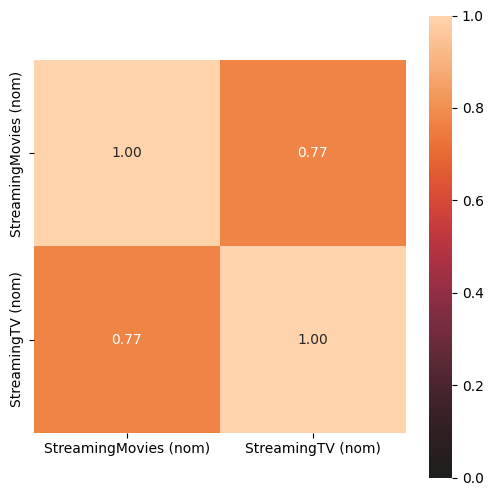

{'corr':                        StreamingMovies (nom)  StreamingTV (nom)
 StreamingMovies (nom)               1.000000           0.770967
 StreamingTV (nom)                   0.770967           1.000000,
 'ax': <Axes: >}

In [ ]:
from dython.nominal import associations
associations(
    df[['StreamingMovies','StreamingTV']],
    nominal_columns=['StreamingMovies','StreamingTV'],
    figsize=(6,6),
    mark_columns=True
)

## drop sreamingtv

In [ ]:
df.drop(['StreamingTV'],axis=1,inplace=True)

In [ ]:
df

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,DSL,Yes,No,Yes,No,No,One year,No,Mailed check,1889.50,No
2,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,DSL,Yes,No,Yes,Yes,No,One year,No,Bank transfer (automatic),1840.75,No
4,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,1990.50,No
7039,Fiber optic,No,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),7362.90,No
7040,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.60,Yes


<h3 style="background-color: #98CD00; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
 Encoding
</h3>


In [ ]:
df['Churn']

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


## Make Resample

In [ ]:

df['Churn']=df['Churn'].map({'No':0,'Yes':1})

In [ ]:
columns_object=[col for col in df.columns if df[col].dtype=="object"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(df[columns_object])

encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(columns_object),
    index=df.index
)

df = pd.concat([df.drop(columns_object, axis=1), encoded_df], axis=1)


In [ ]:
df

,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,29.85,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1889.50,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,108.15,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1840.75,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,151.65,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7039,7362.90,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,346.45,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,306.60,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


<h3 style="background-color: #98CD00; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
 Resample
</h3>


In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
df

,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,29.85,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1889.50,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,108.15,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1840.75,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,151.65,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7039,7362.90,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,346.45,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,306.60,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
!pip install --upgrade --quiet scikit-learn imbalanced-learn


In [ ]:
!pip uninstall -y scikit-learn imbalanced-learn


Found existing installation: scikit-learn 1.7.1
Uninstalling scikit-learn-1.7.1:
  Successfully uninstalled scikit-learn-1.7.1
Found existing installation: imbalanced-learn 0.14.0
Uninstalling imbalanced-learn-0.14.0:
  Successfully uninstalled imbalanced-learn-0.14.0


In [ ]:
!pip install scikit-learn==1.4.2 imbalanced-learn==0.12.3


  Using cached scikit_learn-1.4.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
Using cached scikit_learn-1.4.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.4.2 which is incompatible.


In [ ]:
from imblearn.over_sampling import RandomOverSampler

x = df.drop('Churn', axis=1)
y = df['Churn']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(x, y)


In [ ]:
X_resampled

,TotalCharges,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,29.85,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1889.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,108.15,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1840.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,151.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,49.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10344,79.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10345,25.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10346,3067.20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
y_resample.value_counts()

NameError: name 'y_resample' is not defined

<h3 style="background-color: #98CD00; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
 Scalling
</h3>


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_scalled=scaler.fit_transform(X_resampled[['TotalCharges']])
X_resampled['TotalCharges']=X_scalled


In [ ]:
X_resampled

<h3 style="background-color: #98CD00; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
 Split Data
</h3>


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resample,test_size=0.2,random_state=42)

<h3 style="background-color: #98CD00; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
 Built Model
</h3>


In [ ]:
X_train.shape[1]

In [ ]:
model=Sequential([
    Dense(124,input_shape=(19,),activation="relu"),
    Dropout(0.5),
    Dense(64,activation="relu"),
    Dropout(0.3),
    Dense(32,activation="relu"),
    Dropout(0.1),
    Dense(1,activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)



In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h3 style="background-color: #98CD00; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
 Tensorboard
</h3>


In [ ]:
# if need to visualize Tensoboard
#add

#%load_ext tensorboard
#%tensorboard --logdir logs/fit
#import datetime
#log_dir="logs/fit/"+datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
#tensorboard_callback=tf.keras.callbacks.TensorBoard(
 #   log_dir=log_dir,
  #  histogram_freq=1,
   # write_graph=True,
    #update_freq="epoch",
    #profile_batch=0)

# change model fit to
#model.fit(X_train,y_train,epochs=4000,callbacks=[tensorboard_callback])


# observe
# Run this code in colab

<h3 style="background-color: #98CD00; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
 Model Evaluation
</h3>


In [ ]:

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
test_loss,test_acc=model.evaluate(X_test,y_test)

In [ ]:
train_loss,train_acc=model.evaluate(X_train,y_train)

## So No Overfitiong in my model

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred_classes=(y_pred>0.5).astype('int32')

In [ ]:
y_pred_classes

In [ ]:
cm=confusion_matrix(y_test,y_pred_classes)
print("Confusion Matrix:\n", cm)

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
cl=classification_report(y_test,y_pred_classes)
print("classification report :\n",cl)

<h1 style="text-align: center; color: #98CD00; font-family: Arial, sans-serif;">
  THANKS
</h1>

<h3 style="text-align: center; color: #A4DD00; font-family: Arial, sans-serif;">
  Deep Learning
</h3>
